Import necessary libraries 

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px 
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS
import matplotlib.colors as cm
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
punc=string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('punkt')
from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')#mount drive onto collab
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/posts.csv')#upload posts CV collated in posts collation file

Mounted at /content/gdrive


In [3]:
data

,Unnamed: 0,Title,Post Text,ID,Total Comments,Post URL,Author,Upvotes,Date/Time
0,0,For anyone looking to break into Cybersecurity..,I have found a really good Cybersecurity found...,12670b4,142,https://www.reddit.com/r/cybersecurity/comment...,benittotomy,1312,1.680139e+09
1,1,F*ck Cybersecurity,Let me reiterate. F\*ck the bureaucratic proce...,12aumfx,413,https://www.reddit.com/r/cybersecurity/comment...,Adorable-Roll-761,1142,1.680549e+09
2,2,"Wireshark Cheat Sheet: All the Commands, Filte...",NaN,12gjdva,29,https://www.stationx.net/wireshark-cheat-sheet/,flacao9,919,1.681047e+09
3,3,I finally landed a job!!!,I finally got offered a job!! I posted a few m...,12mj29w,216,https://www.reddit.com/r/cybersecurity/comment...,Suitable_Onion2510,847,1.681517e+09
4,4,Hackers Can Remotely Open Smart Garage Doors A...,NaN,12cgtj7,190,https://www.vice.com/en/article/pkadqy/hackers...,uniqualykerd,704,1.680693e+09
...,...,...,...,...,...,...,...,...,...
995,995,How to call a function from JSON-Array?,Hello!\n\nI am currently building a chatbot on...,12wa4fv,2,https://www.reddit.com/r/learnpython/comments/...,Ventura92,12,1.682259e+09
996,996,I cant seem to get my door alarm code to work,[https://pastebin.com/mAwCgQMn](https://pasteb...,12rrfye,5,https://www.reddit.com/r/learnpython/comments/...,charbot3000,14,1.681907e+09
997,997,Why I am not able to write in the text file?,"\nHello coders,\nIn currently learning File IO...",12rim2r,21,https://www.reddit.com/r/learnpython/comments/...,heyReborn,12,1.681883e+09
998,998,Beginning level: use of single quote and doubl...,I am a beginner. I'm confused as to why Income...,12op1ig,13,https://www.reddit.com/r/learnpython/comments/...,mezzopiano1234,12,1.681679e+09


Data Preprocessing

In [4]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'],unit='s')#change UTC time format to pandas datetime format

In [5]:
data["Date"]=data["Date/Time"].dt.date #split the date from the time

In [6]:
data["Hour"]=data["Date/Time"].dt.hour #get data for the hour in which the reddit post was made

In [7]:
data['Day of week'] = \
pd.to_datetime(data['Date/Time']).dt.day_name()#get day of the week in which the reddit post was made

In [8]:
text = "".join(i for i in data.Title if 'Python' not in i and 'python' not in i)#save text from the Title field into text variable

In [9]:
text = text.lower()
text = re.sub('\[.*?\]', '', text)
text = re.sub('https?://\S+|www\.\S+', '', text)
text = re.sub('<.*?>+', '', text)
text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
text = re.sub('\n', '', text)
text = re.sub('\w*\d\w*', '', text)
text = re.sub(r'[^\w\s]','',text)
text=" ".join([word for word in str(text).split() if word not in stop_words])
text = " ".join([stemmer.stem(word) for word in text.split()])
text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [10]:
wordtokens = nltk.word_tokenize(text)
wordtokens

['anyon',
 'look',
 'break',
 'cybersecurityfck',
 'cybersecuritywireshark',
 'cheat',
 'sheet',
 'command',
 'filter',
 'syntaxi',
 'final',
 'land',
 'jobhack',
 'remot',
 'open',
 'smart',
 'garag',
 'door',
 'across',
 'worldsnapchat',
 'ad',
 'chatgpt',
 'style',
 'chatbot',
 'got',
 'write',
 'ransomwar',
 'two',
 'hourstoday',
 'im',
 'final',
 'worriedhack',
 'exploit',
 'wordpress',
 'plugin',
 'flaw',
 'give',
 'full',
 'control',
 'million',
 'sitesirsauthor',
 'efilecom',
 'tax',
 'return',
 'softwar',
 'caught',
 'serv',
 'j',
 'malwarechines',
 'law',
 'compel',
 'citizen',
 'organis',
 'act',
 'covert',
 'arm',
 'state',
 'secur',
 'demandfbi',
 'denver',
 'avoid',
 'use',
 'free',
 'charg',
 'station',
 'airport',
 'hotel',
 'shop',
 'centersu',
 'uk',
 'warn',
 'russian',
 'hacker',
 'exploit',
 'cisco',
 'router',
 'flaw',
 'espionagear',
 'cybersecur',
 'job',
 'know',
 'tool',
 'organ',
 'use',
 'rather',
 'learn',
 'core',
 'skillsgithub',
 'order',
 'identifi',
 '

Graph 1 : Wordcloud

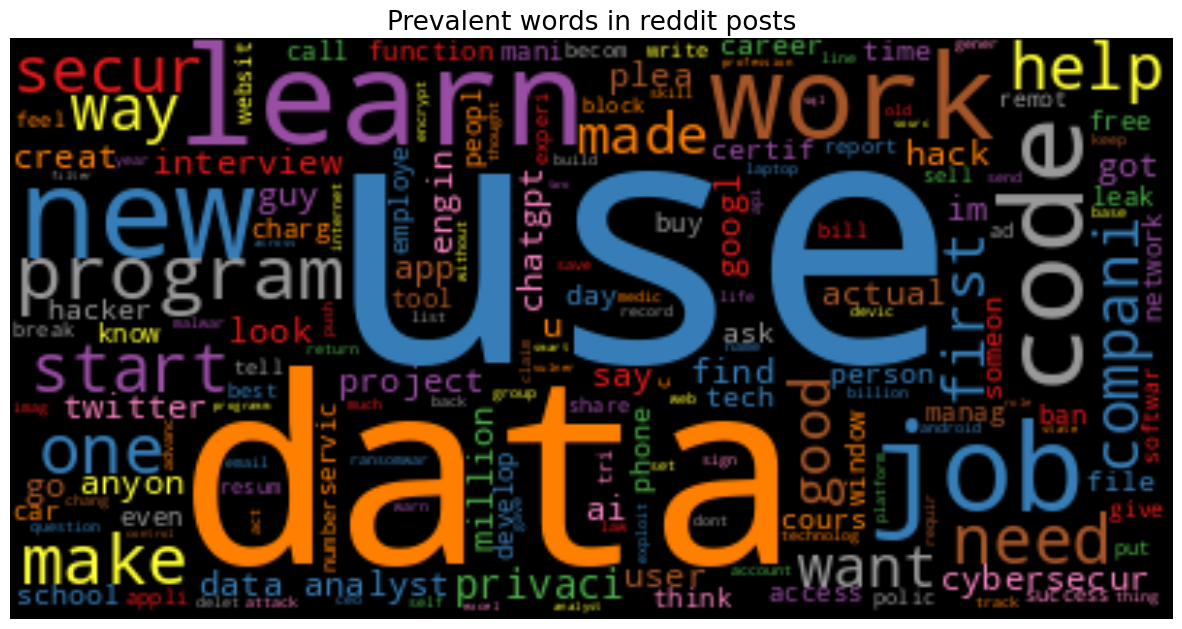

In [11]:
wordcloud = WordCloud(max_words=175, colormap='Set1',background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.title('Prevalent words in reddit posts',fontsize=19)
plt.show()

Graph 2 : Word Frequency Distribution

In [12]:
from nltk.corpus.reader.wordnet import FreqDist
freq=FreqDist(wordtokens)

In [13]:
freq

FreqDist({'data': 80, 'use': 64, 'learn': 39, 'new': 35, 'get': 35, 'program': 31, 'job': 30, 'work': 28, 'code': 27, 'secur': 24, ...})

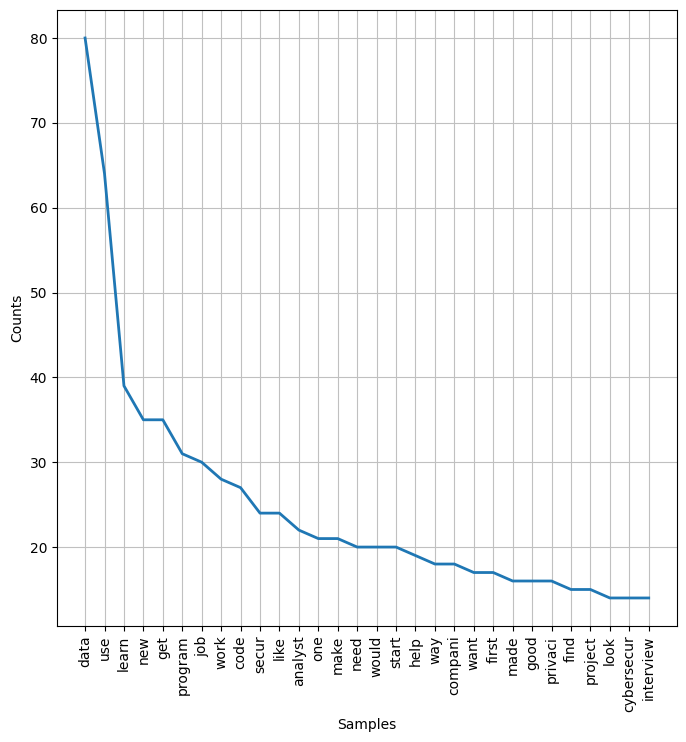

<Axes: xlabel='Samples', ylabel='Counts'>

In [14]:
fig,ax=plt.subplots(figsize=(8, 8))
freq.plot(30)

Graph 3 : Heatmap for missing Values

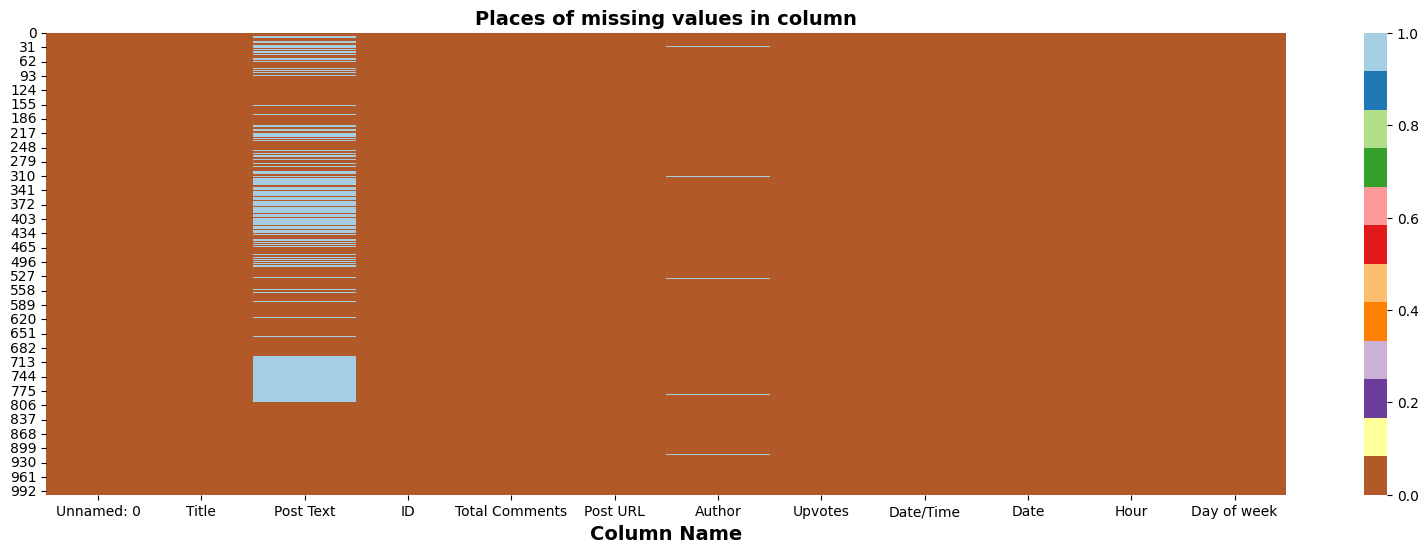

In [15]:
plt.figure(figsize=(20, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

Graph 4: Top 10 posts with most upvotes

In [16]:
data1 = pd.read_csv('gdrive/My Drive/Colab Notebooks/posts.csv')#reupload data as title has been stemmed and lemmatized

In [17]:
data

,Unnamed: 0,Title,Post Text,ID,Total Comments,Post URL,Author,Upvotes,Date/Time,Date,Hour,Day of week
0,0,For anyone looking to break into Cybersecurity..,I have found a really good Cybersecurity found...,12670b4,142,https://www.reddit.com/r/cybersecurity/comment...,benittotomy,1312,2023-03-30 01:15:57,2023-03-30,1,Thursday
1,1,F*ck Cybersecurity,Let me reiterate. F\*ck the bureaucratic proce...,12aumfx,413,https://www.reddit.com/r/cybersecurity/comment...,Adorable-Roll-761,1142,2023-04-03 19:17:32,2023-04-03,19,Monday
2,2,"Wireshark Cheat Sheet: All the Commands, Filte...",NaN,12gjdva,29,https://www.stationx.net/wireshark-cheat-sheet/,flacao9,919,2023-04-09 13:25:09,2023-04-09,13,Sunday
3,3,I finally landed a job!!!,I finally got offered a job!! I posted a few m...,12mj29w,216,https://www.reddit.com/r/cybersecurity/comment...,Suitable_Onion2510,847,2023-04-15 00:10:07,2023-04-15,0,Saturday
4,4,Hackers Can Remotely Open Smart Garage Doors A...,NaN,12cgtj7,190,https://www.vice.com/en/article/pkadqy/hackers...,uniqualykerd,704,2023-04-05 11:15:05,2023-04-05,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,How to call a function from JSON-Array?,Hello!\n\nI am currently building a chatbot on...,12wa4fv,2,https://www.reddit.com/r/learnpython/comments/...,Ventura92,12,2023-04-23 14:15:22,2023-04-23,14,Sunday
996,996,I cant seem to get my door alarm code to work,[https://pastebin.com/mAwCgQMn](https://pasteb...,12rrfye,5,https://www.reddit.com/r/learnpython/comments/...,charbot3000,14,2023-04-19 12:22:57,2023-04-19,12,Wednesday
997,997,Why I am not able to write in the text file?,"\nHello coders,\nIn currently learning File IO...",12rim2r,21,https://www.reddit.com/r/learnpython/comments/...,heyReborn,12,2023-04-19 05:49:07,2023-04-19,5,Wednesday
998,998,Beginning level: use of single quote and doubl...,I am a beginner. I'm confused as to why Income...,12op1ig,13,https://www.reddit.com/r/learnpython/comments/...,mezzopiano1234,12,2023-04-16 21:08:07,2023-04-16,21,Sunday


In [18]:
upvotes = data1.sort_values(by='Upvotes', ascending=False)

In [19]:
upvotes1 = upvotes.head(10)

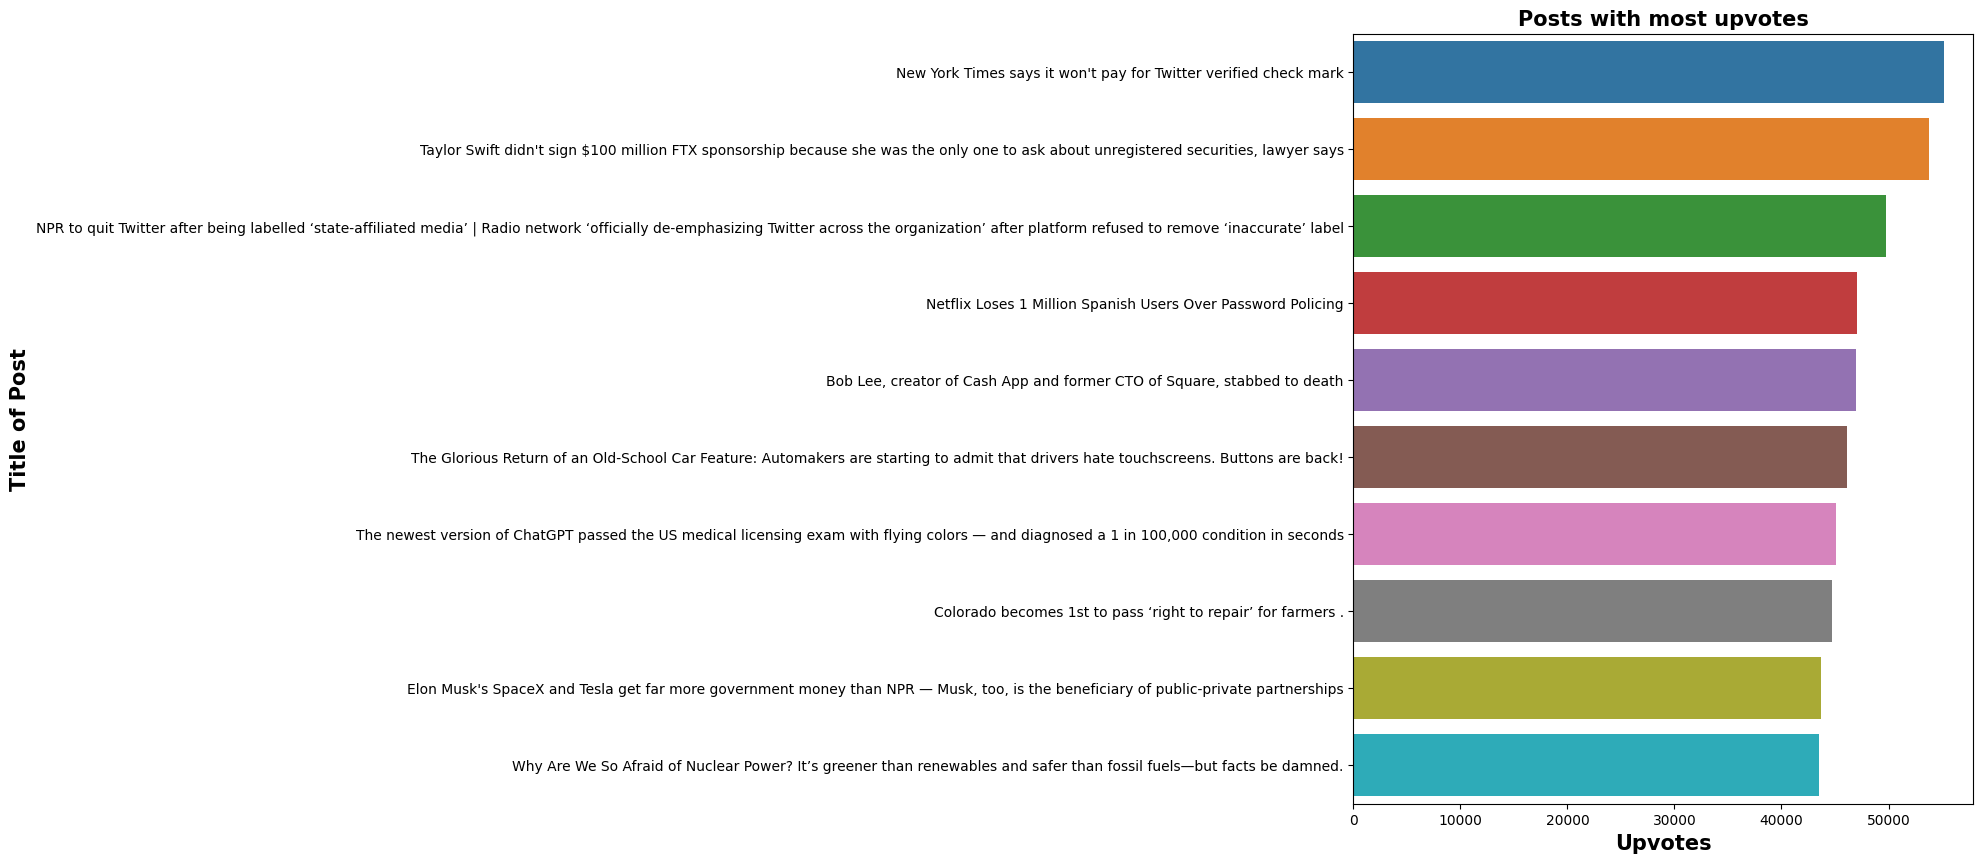

In [20]:
plt.figure(figsize=(8, 10))
sns.barplot(y='Title',x='Upvotes',data=upvotes1)
plt.title('Posts with most upvotes',weight='bold', size=15)
plt.ylabel('Title of Post', size=15, weight='bold')
plt.xlabel('Upvotes', size=15, weight='bold')
plt.show()

Graph 5:Top 10 authors with the most posts

In [21]:

Author =data['Author'].value_counts().reset_index()

In [22]:
Author = Author.head(10)

In [23]:
Author

,index,Author
0,DrinkMoreCodeMore,14
1,speckz,9
2,KolideKenny,8
3,mkbt,7
4,chrisdh79,7
5,wewewawa,6
6,Realistic-Cap6526,5
7,esporx,4
8,r-trappe,4
9,Ssider69,4


<Axes: xlabel='count', ylabel='Author'>

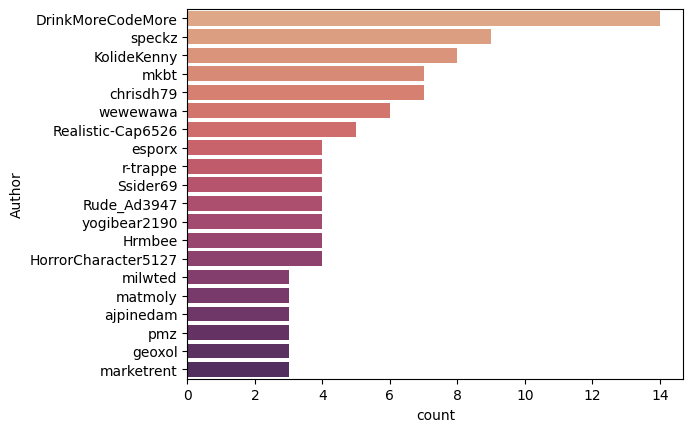

In [24]:
sns.countplot(y="Author", data=data, palette="flare",
              order=data.Author.value_counts().iloc[:20].index)

Analysis of Date/Time

In [25]:
data["Date/Time"].min(), data["Date/Time"].max()

(Timestamp('2023-03-29 04:29:27'), Timestamp('2023-04-27 23:49:40'))

In [26]:
data["Date/Time"].max()-data["Date/Time"].min()

Timedelta('29 days 19:20:13')

Graph 6:Top 10 most active hours to post 

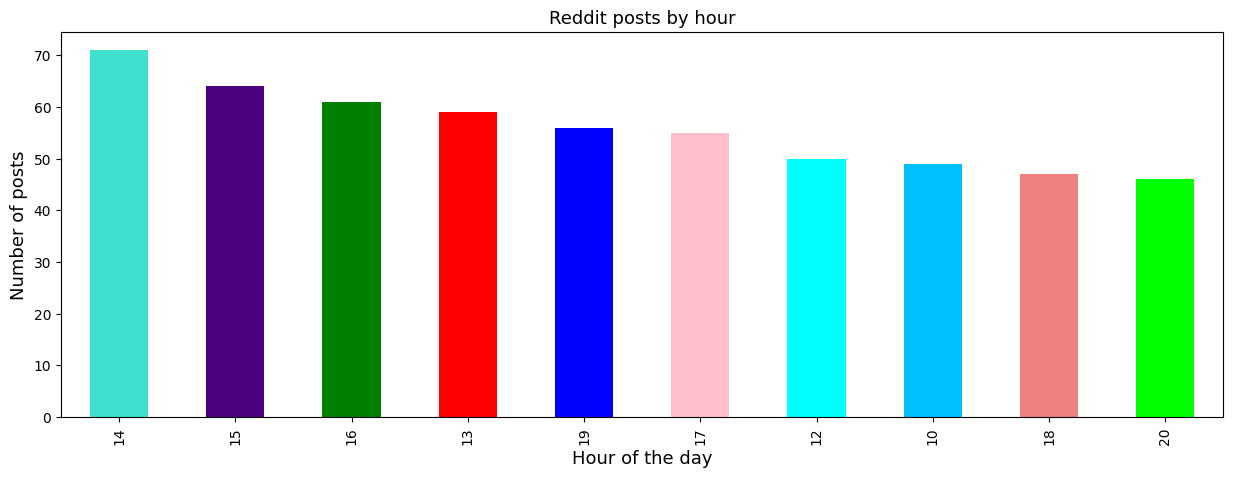

In [27]:
plt.figure(figsize=(15,5))
src = data['Hour'].value_counts().sort_values(ascending=False).head(10)

src.plot.bar(color=['turquoise','indigo','green','red','blue','pink','cyan','deepskyblue','lightcoral','lime'])
plt.title('Reddit posts by hour',size=13)
plt.xlabel('Hour of the day',size=13)
plt.ylabel('Number of posts',size=13)
plt.show()

Graph 7:Posts by Day of the week 

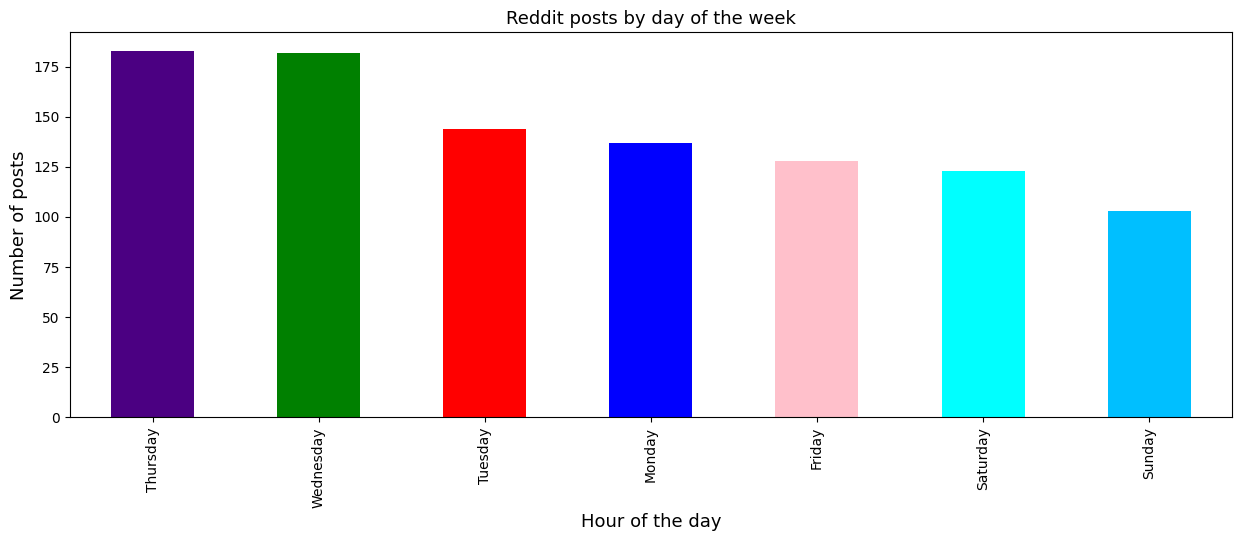

In [28]:
plt.figure(figsize=(15,5))
src = data['Day of week'].value_counts().sort_values(ascending=False).head(10)

src.plot.bar(color=['indigo','green','red','blue','pink','cyan','deepskyblue'])
plt.title('Reddit posts by day of the week',size=13)
plt.xlabel('Hour of the day',size=13)
plt.ylabel('Number of posts',size=13)
plt.show()

Graph 8: Top days of most reddit posts

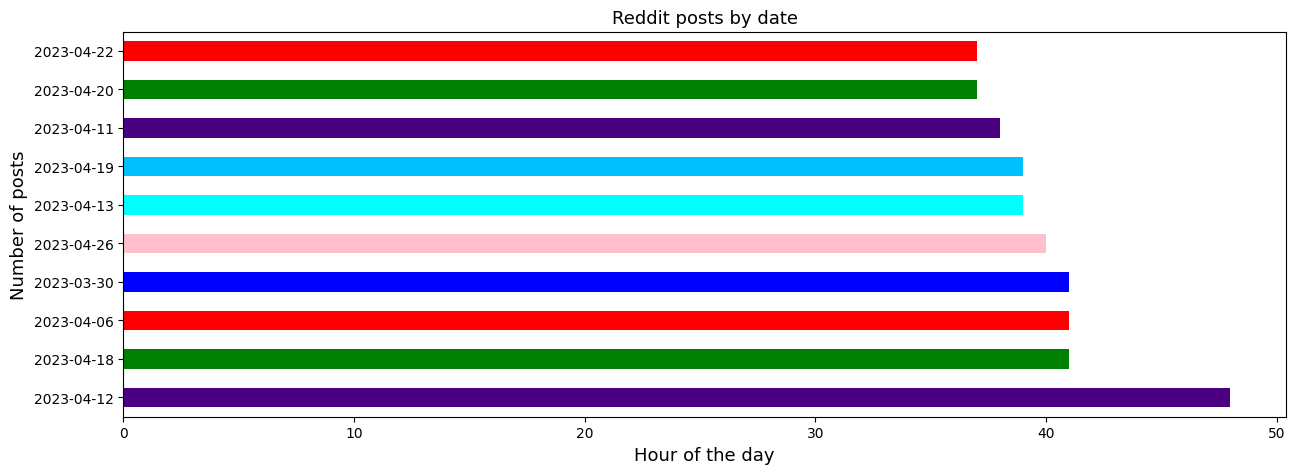

In [29]:
plt.figure(figsize=(15,5))
src = data['Date'].value_counts().sort_values(ascending=False).head(10)

src.plot.barh(color=['indigo','green','red','blue','pink','cyan','deepskyblue'])
plt.title('Reddit posts by date',size=13)
plt.xlabel('Hour of the day',size=13)
plt.ylabel('Number of posts',size=13)
plt.show()